# EDA Tool Report
The EDA tool is a Python class designed to assist with Exploratory Data Analysis (EDA) tasks on a given dataset. The tool provides various functionalities to handle missing values, categorical data, scale data, and create visualizations like box plots, bar charts, scatter plots, and heatmaps.

Below is a summary of the key functionalities provided by the AutoEDA tool:

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [27]:
class AutoEDA:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    @staticmethod
    def read_data(): 
        while True:
            data_type = input("Enter the data type (csv, excel): ").lower()
            
            if data_type not in ['csv', 'excel']:
                print("Unsupported data type. Supported types: 'csv', 'excel'")
                continue
            
            data_path = input("Enter the path to the data file: ")
            
            try:
                if data_type == 'csv':
                    data = pd.read_csv(data_path)
                elif data_type == 'excel':
                    data = pd.read_excel(data_path)
                print("Your data has been loaded")
                return data
            except FileNotFoundError:
                print("File not found. Please check the file path.")
            except Exception as e:
                print(f"An error occurred: {e}")

    def handle_missing_values(self, method='mean', inplace=True): 
        try:
            df = self.dataframe if inplace else self.dataframe.copy()
            if method == 'mean':
                df.fillna(df.mean(), inplace=True)
            elif method == 'median':
                df.fillna(df.median(), inplace=True)
            elif method == 'drop':
                df.dropna(inplace=True)
            return df
        except Exception as e:
            print(f"An error occurred: {e}")
            return None
    
    def handle_categorical_data(self, method='OHE', inplace=True): 
        try:
            df = self.dataframe if inplace else self.dataframe.copy()
            columns = df.select_dtypes(include=['object']).columns

            if method == 'OHE':
                df = pd.get_dummies(df, columns=columns, drop_first=True)
            elif method == 'LE':
                encoder = LabelEncoder()
                for col in columns:
                    df[col] = encoder.fit_transform(df[col])

            return df
        except Exception as e:
            print(f"An error occurred: {e}")
            return None
    
    def scaling_data(self, method='standard', inplace=True): 
        try:
            df = self.dataframe if inplace else self.dataframe.copy()

            if method == 'min_max':
                scaler = MinMaxScaler()
            elif method == 'standard':
                scaler = StandardScaler()

            df = scaler.fit_transform(df)
            df = pd.DataFrame(df, columns=self.dataframe.columns)

            return df
        except Exception as e:
            print(f"An error occurred: {e}")
            return None

    def create_boxplot(self):
        while True:
            column = input("Enter the column to show boxplot visualization: ")

            if column not in self.dataframe.columns:
                print(f"Column '{column}' not found in the DataFrame.")
                continue

            try:
                plt.figure(figsize=(8, 6))
                plt.boxplot(self.dataframe[column], vert=True)
                plt.title(f"Box Plot of {column}")
                plt.xlabel(column)
                plt.ylabel("Values")
                plt.show()
                break
            except Exception as e:
                print(f"An error occurred: {e}")

    def create_barchart(self):
        while True:
            x_column = input("Enter the first column: ")
            y_column = input("Enter the second column: ")

            if x_column not in self.dataframe.columns:
                print(f"Column '{x_column}' not found in the DataFrame.")
                continue

            if y_column not in self.dataframe.columns:
                print(f"Column '{y_column}' not found in the DataFrame.")
                continue

            try:
                plt.figure(figsize=(8, 6))
                plt.bar(self.dataframe[x_column], self.dataframe[y_column])
                plt.title(f"Bar Chart of {y_column} vs. {x_column}")
                plt.xlabel(x_column)
                plt.ylabel(y_column)
                plt.show()
                break
            except KeyError:
                print("One or more columns not found in the DataFrame.")
            except Exception as e:
                print(f"An error occurred: {e}")

    def create_scatter(self):
        while True:
            x_column = input("Enter the first column: ")
            y_column = input("Enter the second column: ")

            if x_column not in self.dataframe.columns:
                print(f"Column '{x_column}' not found in the DataFrame.")
                continue

            if y_column not in self.dataframe.columns:
                print(f"Column '{y_column}' not found in the DataFrame.")
                continue

            try:
                plt.figure(figsize=(8, 6))
                plt.scatter(self.dataframe[x_column], self.dataframe[y_column], c='blue', alpha=0.5, s=30)
                plt.title(f"Scatter Plot of {y_column} vs. {x_column}")
                plt.xlabel(x_column)
                plt.ylabel(y_column)
                plt.grid(True)
                plt.show()
                break
            except KeyError:
                print("One or more columns not found in the DataFrame.")
            except Exception as e:
                print(f"An error occurred: {e}")

    def create_heatmap(self):
        plt.figure(figsize=(12, 10))
        sns.heatmap(self.dataframe.corr(), annot=True, cmap='coolwarm', center=0)
        plt.title("Correlation Heatmap")
        plt.show()


In [28]:
print("Welcome to Automated EDA tool!")
print("This tool helps you perform Exploratory Data Analysis (EDA) on your dataset.")
print("Follow the prompts and choose the options that best fit your analysis.")
print("Let's get started!")

Welcome to AutoEDA tool!
This tool helps you perform Exploratory Data Analysis (EDA) on your dataset.
Follow the prompts and choose the options that best fit your analysis.
Let's get started!


In [29]:
eda_tool = AutoEDA(dataframe=None)
loaded_data = eda_tool.read_data()
print("\nLoaded Data:")
print(loaded_data.head())

Enter the data type (csv, excel): csv
Enter the path to the data file: BlackFriday.csv
Your data has been loaded

Loaded Data:
   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN    

In [30]:
auto_eda = AutoEDA(loaded_data)
handled_data = auto_eda.handle_missing_values(method='drop')
print("\nMissing values handled successfully.")


Missing values handled successfully.


In [31]:
if handled_data is not None:
    print(handled_data.isna().sum())

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64


In [32]:
handled_data = auto_eda.handle_categorical_data(method='LE')
print("\nCategorical data handled successfully.")
print(handled_data.head())


Categorical data handled successfully.
    User_ID  Product_ID  Gender  Age  Occupation  City_Category  \
1   1000001         392       0    0          10              0   
6   1000004         285       1    4           7              1   
13  1000005         212       1    2          20              0   
14  1000006         364       0    5           9              0   
16  1000006         518       0    5           9              0   

    Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
1                            2               0                   1   
6                            2               1                   1   
13                           1               1                   1   
14                           1               0                   5   
16                           1               0                   2   

    Product_Category_2  Product_Category_3  Purchase  
1                  6.0                14.0     15200  
6                  8.0    

In [33]:
handled_data = auto_eda.scaling_data(method='standard')
print("\nData scaled successfully.")
print(handled_data.head())


Data scaled successfully.
    User_ID  Product_ID    Gender       Age  Occupation  City_Category  \
0 -1.743510    1.119015 -1.856912 -1.838398    0.280516      -1.431523   
1 -1.741766    0.378669  0.538529  1.157248   -0.181970      -0.115347   
2 -1.741185   -0.126426  0.538529 -0.340575    1.822135      -1.431523   
3 -1.740604    0.925279 -1.856912  1.906160    0.126354      -1.431523   
4 -1.740604    1.990823 -1.856912  1.906160    0.126354      -1.431523   

   Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                    0.106789       -0.820279           -0.676709   
1                    0.106789        1.219097           -0.676709   
2                   -0.671350        1.219097           -0.676709   
3                   -0.671350       -0.820279            0.877387   
4                   -0.671350       -0.820279           -0.288185   

   Product_Category_2  Product_Category_3  Purchase  
0           -0.199151            0.322515  0.696442  
1    

Enter the column to show boxplot visualization: Product_Category_1


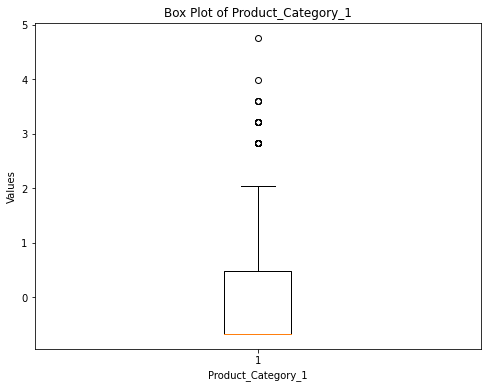


Thank you for using AutoEDA. Have a great day!


In [41]:
auto_eda.create_boxplot()

print("\nThank you for using AutoEDA. Have a great day!")

Enter the first column: Product_Category_2
Enter the second column: Purchase


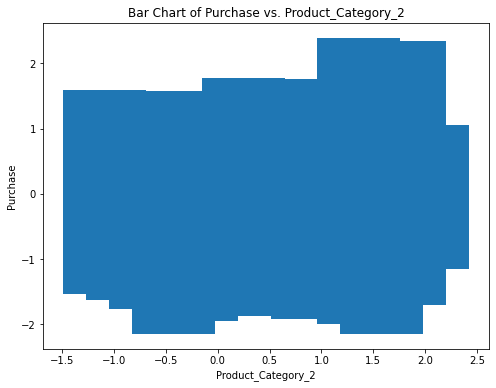

In [36]:
auto_eda = AutoEDA(handled_data[0:1000])
auto_eda.create_barchart()

Enter the first column: Purchase
Enter the second column: City_Category


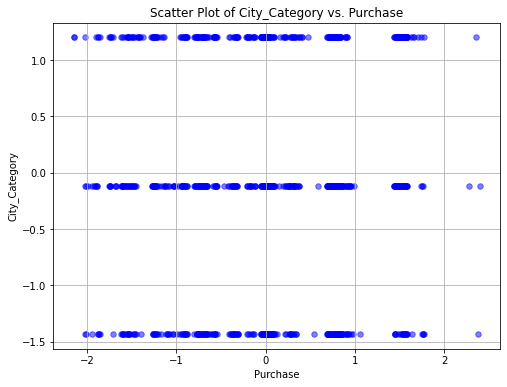

In [37]:
auto_eda.create_scatter()

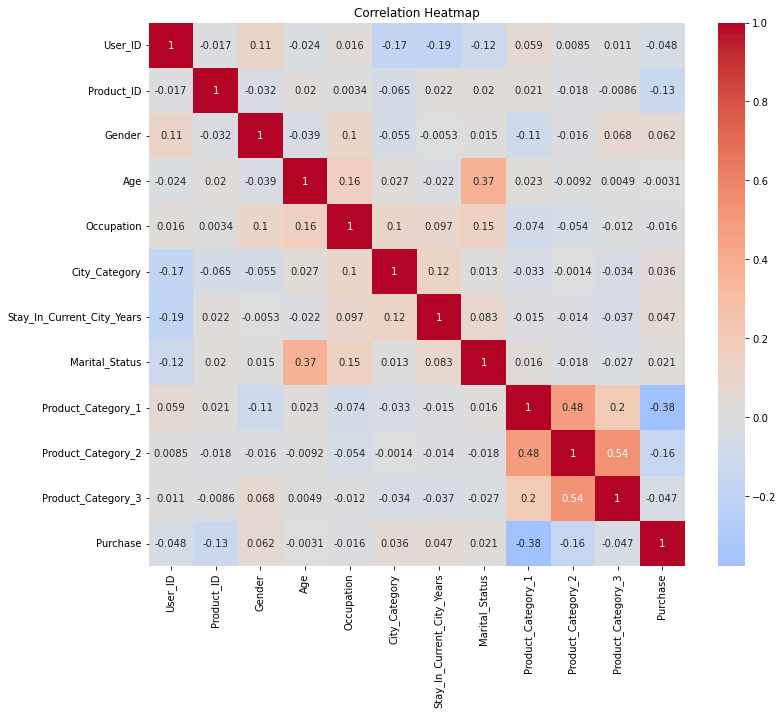

In [38]:
auto_eda.create_heatmap()

# Recommendations
The tool is interactive and can be extended to handle more advanced EDA tasks.
Users may need to uncomment specific visualization functions to generate the desired plots based on their analysis needs.
This Automated EDA tool provides a basic framework for data preprocessing and visualization and can be further customized to suit specific EDA requirements.

Thank you for using the Automated EDA tool!